In [1]:
import torch
import numpy as np
import matlab.engine

import matplotlib.pyplot as plt
from IPython.display import clear_output

from ipywidgets import interact
import ipywidgets as widgets

In [2]:
#X = torch.load('X_test')[0]
y = torch.load('y_test')[0][:30]

hslt = y.sum(0).squeeze() #y[::2]
lsht_noised = y + 255*torch.rand_like(y)
lsht_blurred = torch.nn.functional.conv2d(y, torch.ones((1,1,5,5)))
lsht_downscaled = torch.nn.functional.avg_pool2d(y, (2,2), stride=2).squeeze()

In [3]:
np.array(lsht_downscaled).transpose(1,2,0).shape, hslt.shape

((64, 64, 30), torch.Size([128, 128]))

In [4]:
%%time
eng = matlab.engine.start_matlab()
hres = hslt.shape[0]
sigmablur = 1
lsht = np.ascontiguousarray(np.array(lsht_downscaled).transpose(1,2,0))
rec = eng.reconstruct_hres_lifimage(lsht, np.array(hslt), np.array([1, 1e-4, 1e-2, 0]), np.float64(hres), np.float64(sigmablur), nargout=1)
eng.quit()

CPU times: total: 109 ms
Wall time: 1h 38min 58s


In [19]:
y = torch.load('y_test')[0][:30]

hslt = y.sum(0).squeeze() #y[::2]
sigmablur = 1
lsht = np.ascontiguousarray(np.array(lsht_downscaled).transpose(1,2,0))

rec = np.array(torch.load('reconstruction'))

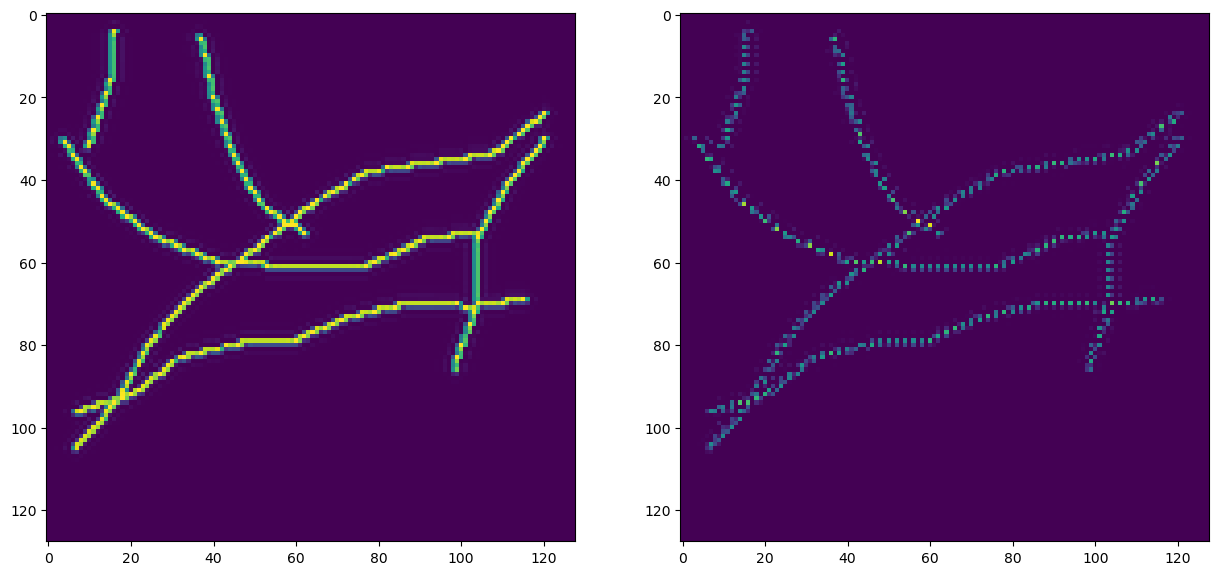

In [20]:
import matplotlib.pyplot as plt
from IPython.display import clear_output

for i in range(30):
    plt.figure(figsize=(15,10))
    plt.subplot2grid((1,2), (0,0))
    plt.imshow(y[i].squeeze())
    plt.subplot2grid((1,2), (0,1))
    plt.imshow(rec[:,:,i])
    plt.show()
    clear_output(wait=True)

In [21]:
def f(i):
    plt.figure(figsize=(15,8))
    plt.subplot2grid((2,2), (0,0))
    plt.imshow(np.array(hslt))
    plt.subplot2grid((2,2), (0,1))
    plt.imshow(np.array(lsht_downscaled)[i])
    
    plt.subplot2grid((2,2), (1,0))
    plt.imshow(y[i].squeeze())
    plt.subplot2grid((2,2), (1,1))
    plt.imshow(rec[:,:,i])
    plt.show()
    return

interact(f, i=widgets.IntSlider(min=0, max=temporal_cut-1, step=1, value=0))

interactive(children=(IntSlider(value=0, description='i', max=9), Output()), _dom_classes=('widget-interact',)…

<function __main__.f(i)>

In [8]:
torch.save(np.array(rec), 'reconstruction')

## 2x temporal

In [11]:
%%time
temporal_cut = 2
spatial_downsampling = 2
sigmablur = 1  # chosen by default

y = torch.load('y_test')[0][:temporal_cut]

hslt = y.sum(0).squeeze() #y[::2]
lsht_downscaled = torch.nn.functional.avg_pool2d(y, (spatial_downsampling, spatial_downsampling), stride=spatial_downsampling).squeeze()

eng = matlab.engine.start_matlab()
hres = hslt.shape[0]
lsht = np.ascontiguousarray(np.array(lsht_downscaled).transpose(1,2,0))
rec = eng.reconstruct_hres_lifimage(lsht, np.array(hslt), np.array([1, 1e-4, 1e-2, 0]), np.float64(hres), np.float64(sigmablur), nargout=1)
eng.quit()

CPU times: total: 109 ms
Wall time: 1min 49s


In [3]:
temporal_cut = 2
spatial_downsampling = 2
sigmablur = 1  # chosen by default

y = torch.load('y_test')[0][:temporal_cut]

hslt = y.sum(0).squeeze() #y[::2]
lsht_downscaled2x2x = torch.nn.functional.avg_pool2d(y, (spatial_downsampling, spatial_downsampling), stride=spatial_downsampling).squeeze()

rec2x2x = np.array(torch.load('reconstruction_t2x_s2x'))

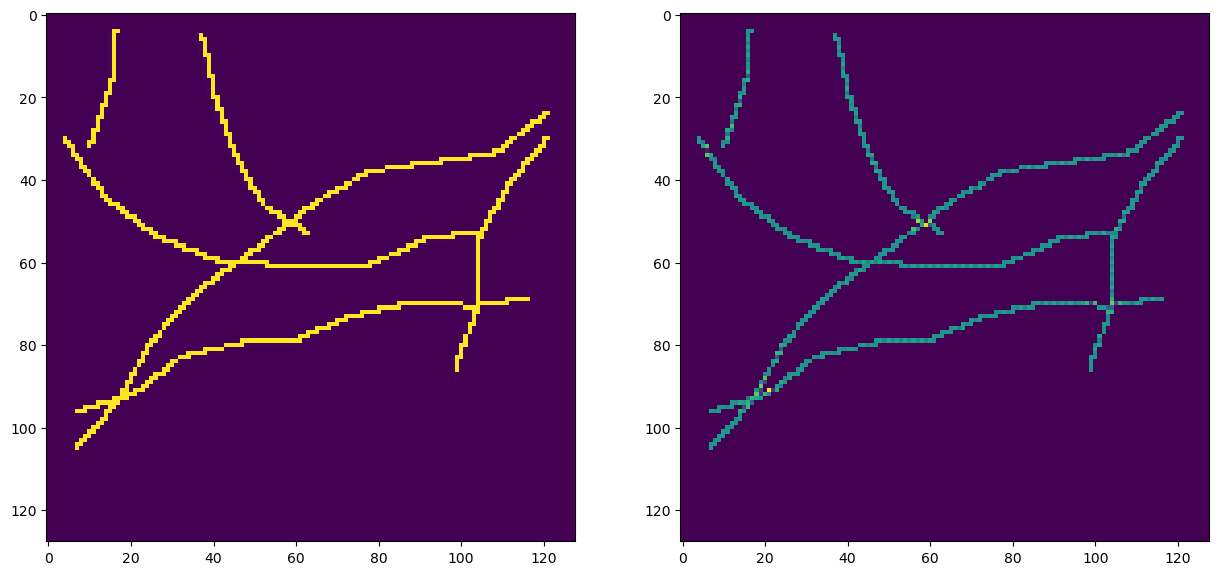

In [3]:
import matplotlib.pyplot as plt
from IPython.display import clear_output

for i in range(temporal_cut):
    plt.figure(figsize=(15,10))
    plt.subplot2grid((1,2), (0,0))
    plt.imshow(y[i].squeeze())
    plt.subplot2grid((1,2), (0,1))
    plt.imshow(rec2x2x[:,:,i])
    plt.show()
    clear_output(wait=True)

In [14]:
torch.save(np.array(rec), 'reconstruction_t2x_s2x')

## 

In [5]:
def f(i):
    plt.figure(figsize=(15,8))
    plt.subplot2grid((2,2), (0,0))
    plt.imshow(hslt)
    plt.subplot2grid((2,2), (0,1))
    plt.imshow(np.array(lsht_downscaled2x2x)[i])
    
    plt.subplot2grid((2,2), (1,0))
    plt.imshow(y[i].squeeze())
    plt.subplot2grid((2,2), (1,1))
    plt.imshow(rec2x2x[:,:,i])
    plt.show()
    return

interact(f, i=widgets.IntSlider(min=0, max=temporal_cut-1, step=1, value=0))

interactive(children=(IntSlider(value=0, description='i', max=1), Output()), _dom_classes=('widget-interact',)…

<function __main__.f(i)>

## 4x spatial downsampling

In [15]:
%%time
temporal_cut = 2
spatial_downsampling = 4
sigmablur = 1  # chosen by default

y = torch.load('y_test')[0][:temporal_cut]

hslt = y.sum(0).squeeze() #y[::2]
lsht_downscaled = torch.nn.functional.avg_pool2d(y, (spatial_downsampling, spatial_downsampling), stride=spatial_downsampling).squeeze()

eng = matlab.engine.start_matlab()
hres = hslt.shape[0]
lsht = np.ascontiguousarray(np.array(lsht_downscaled).transpose(1,2,0))
rec = eng.reconstruct_hres_lifimage(lsht, np.array(hslt), np.array([1, 1e-4, 1e-2, 0]), np.float64(hres), np.float64(sigmablur), nargout=1)
eng.quit()

CPU times: total: 46.9 ms
Wall time: 38.2 s


In [6]:
temporal_cut = 2
spatial_downsampling = 4
sigmablur = 1  # chosen by default

y = torch.load('y_test')[0][:temporal_cut]

hslt = y.sum(0).squeeze() #y[::2]
lsht_downscaled2x4x = torch.nn.functional.avg_pool2d(y, (spatial_downsampling, spatial_downsampling), stride=spatial_downsampling).squeeze()

rec2x4x = np.array(torch.load('reconstruction_t2x_s4x'))

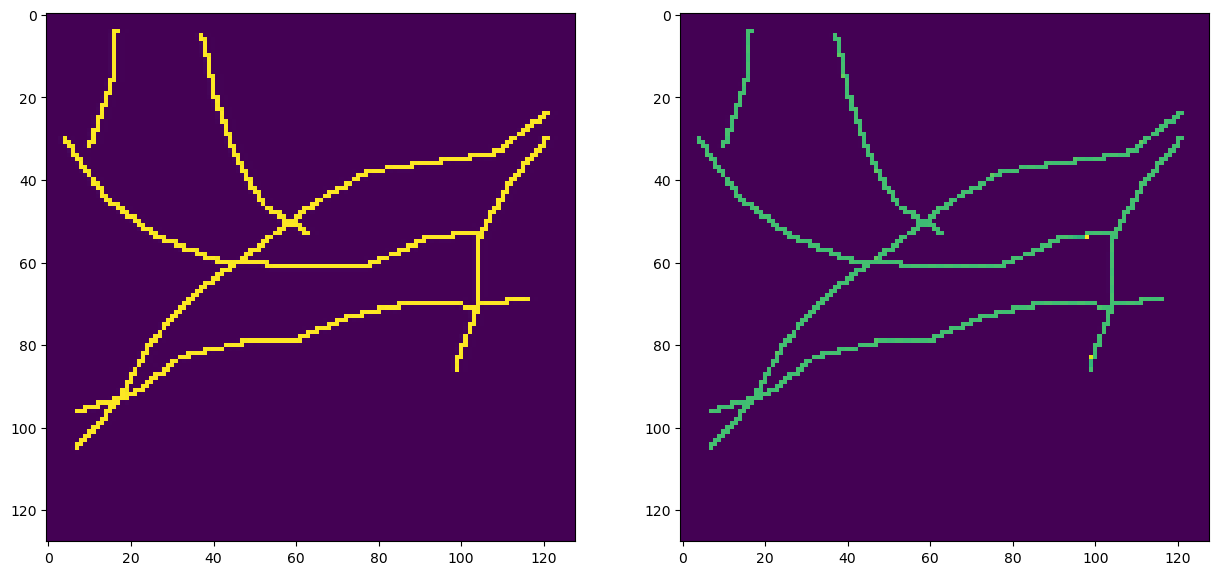

In [5]:
import matplotlib.pyplot as plt
from IPython.display import clear_output

for i in range(temporal_cut):
    plt.figure(figsize=(15,10))
    plt.subplot2grid((1,2), (0,0))
    plt.imshow(y[i].squeeze())
    plt.subplot2grid((1,2), (0,1))
    plt.imshow(rec2x4x[:,:,i])
    plt.show()
    clear_output(wait=True)

In [18]:
torch.save(np.array(rec), 'reconstruction_t2x_s4x')

## 

In [7]:
def f(i):
    plt.figure(figsize=(15,8))
    plt.subplot2grid((2,2), (0,0))
    plt.imshow(hslt)
    plt.subplot2grid((2,2), (0,1))
    plt.imshow(np.array(lsht_downscaled2x4x)[i])
    
    plt.subplot2grid((2,2), (1,0))
    plt.imshow(y[i].squeeze())
    plt.subplot2grid((2,2), (1,1))
    plt.imshow(rec2x4x[:,:,i])
    plt.show()
    return

interact(f, i=widgets.IntSlider(min=0, max=temporal_cut-1, step=1, value=0))

interactive(children=(IntSlider(value=0, description='i', max=1), Output()), _dom_classes=('widget-interact',)…

<function __main__.f(i)>

## 4x spatial downsampling 10x temporal

In [19]:
%%time
temporal_cut = 10
spatial_downsampling = 4
sigmablur = 1  # chosen by default

y = torch.load('y_test')[0][:temporal_cut]

hslt = y.sum(0).squeeze() #y[::2]
lsht_downscaled = torch.nn.functional.avg_pool2d(y, (spatial_downsampling, spatial_downsampling), stride=spatial_downsampling).squeeze()

eng = matlab.engine.start_matlab()
hres = hslt.shape[0]
lsht = np.ascontiguousarray(np.array(lsht_downscaled).transpose(1,2,0))
rec = eng.reconstruct_hres_lifimage(lsht, np.array(hslt), np.array([1, 1e-4, 1e-2, 0]), np.float64(hres), np.float64(sigmablur), nargout=1)
eng.quit()

CPU times: total: 15.6 ms
Wall time: 9min 30s


In [8]:
temporal_cut = 10
spatial_downsampling = 4
sigmablur = 1  # chosen by default

y = torch.load('y_test')[0][:temporal_cut]

hslt = y.sum(0).squeeze() #y[::2]
lsht_downscaled10x4x = torch.nn.functional.avg_pool2d(y, (spatial_downsampling, spatial_downsampling), stride=spatial_downsampling).squeeze()

rec10x4x = np.array(torch.load('reconstruction_t10x_s4x'))

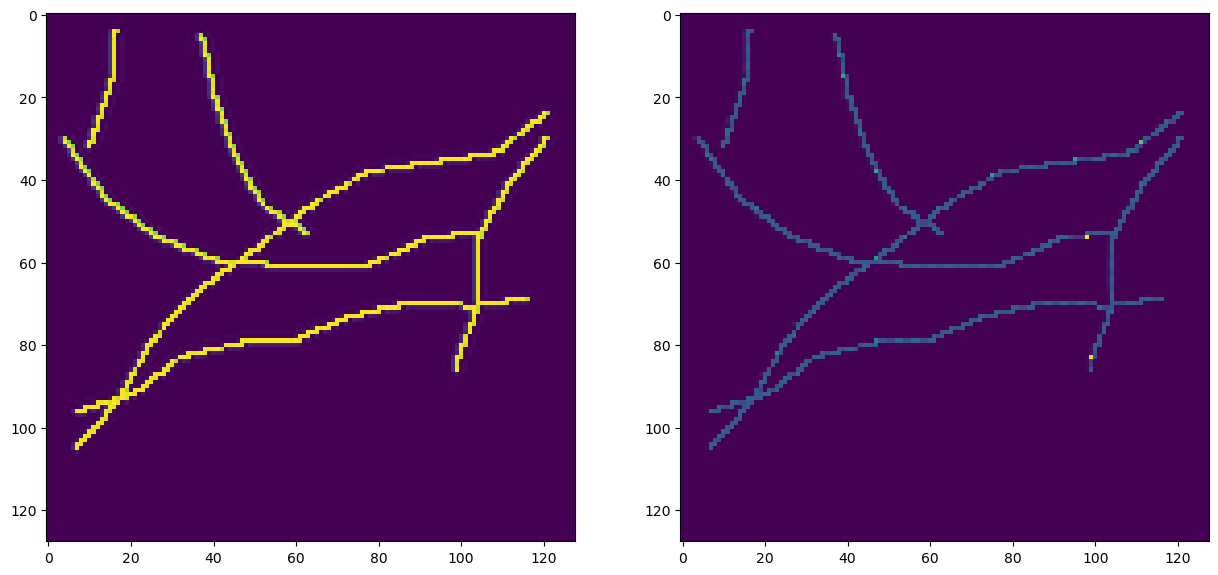

In [8]:
import matplotlib.pyplot as plt
from IPython.display import clear_output

for i in range(temporal_cut):
    plt.figure(figsize=(15,10))
    plt.subplot2grid((1,2), (0,0))
    plt.imshow(y[i].squeeze())
    plt.subplot2grid((1,2), (0,1))
    plt.imshow(rec10x4x[:,:,i])
    plt.show()
    clear_output(wait=True)

In [22]:
torch.save(np.array(rec), 'reconstruction_t10x_s4x')

## 

In [9]:
def f(i):
    plt.figure(figsize=(15,8))
    plt.subplot2grid((2,2), (0,0))
    plt.imshow(hslt)
    plt.subplot2grid((2,2), (0,1))
    plt.imshow(np.array(lsht_downscaled10x4x)[i])
    
    plt.subplot2grid((2,2), (1,0))
    plt.imshow(y[i].squeeze())
    plt.subplot2grid((2,2), (1,1))
    plt.imshow(rec10x4x[:,:,i])
    plt.show()
    return

interact(f, i=widgets.IntSlider(min=0, max=temporal_cut-1, step=1, value=0))

interactive(children=(IntSlider(value=0, description='i', max=9), Output()), _dom_classes=('widget-interact',)…

<function __main__.f(i)>

## 4x spatial downsampling 10x temporal with movement

In [24]:
%%time
temporal_cut = 10
spatial_downsampling = 4
sigmablur = 1  # chosen by default

y = torch.load('y_test')[0][::300//temporal_cut]

hslt = y.sum(0).squeeze() #y[::2]
lsht_downscaled = torch.nn.functional.avg_pool2d(y, (spatial_downsampling, spatial_downsampling), stride=spatial_downsampling).squeeze()

eng = matlab.engine.start_matlab()
hres = hslt.shape[0]
lsht = np.ascontiguousarray(np.array(lsht_downscaled).transpose(1,2,0))
rec = eng.reconstruct_hres_lifimage(lsht, np.array(hslt), np.array([1, 1e-4, 1e-2, 0]), np.float64(hres), np.float64(sigmablur), nargout=1)
eng.quit()

CPU times: total: 46.9 ms
Wall time: 9min 11s


In [11]:
temporal_cut = 10
spatial_downsampling = 4
sigmablur = 1  # chosen by default

y = torch.load('y_test')[0][::300//temporal_cut]

hslt = y.sum(0).squeeze() #y[::2]
lsht_downscaled10x4xm = torch.nn.functional.avg_pool2d(y, (spatial_downsampling, spatial_downsampling), stride=spatial_downsampling).squeeze()

rec10x4xm = np.array(torch.load('reconstruction_t10x_s4x_moving'))

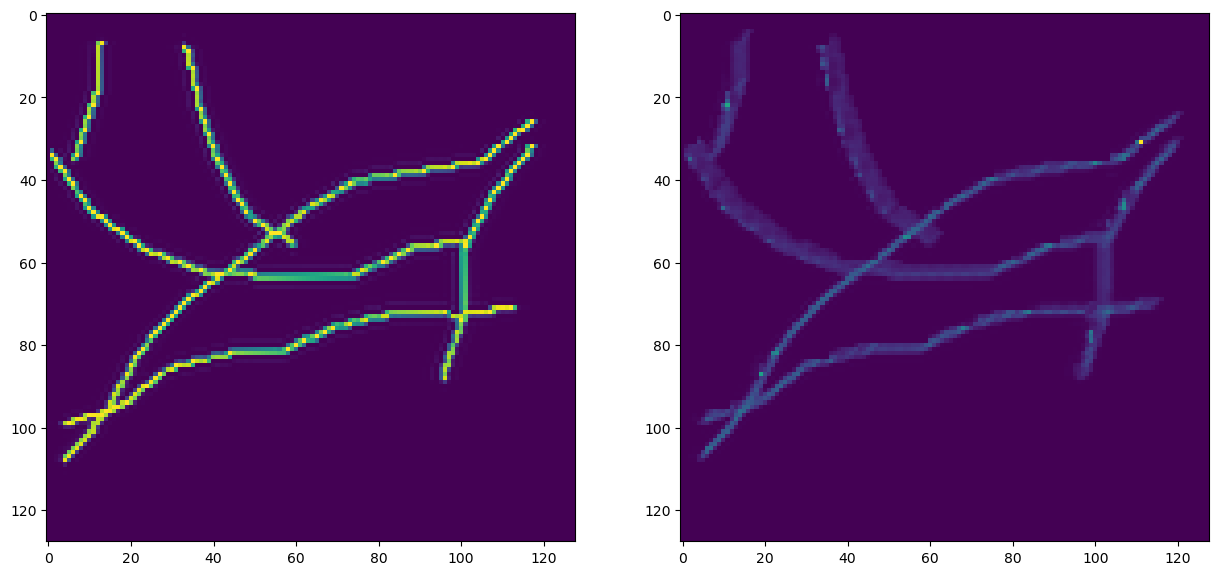

In [13]:
for i in range(temporal_cut):
    plt.figure(figsize=(15,10))
    plt.subplot2grid((1,2), (0,0))
    plt.imshow(y[i].squeeze())
    plt.subplot2grid((1,2), (0,1))
    plt.imshow(rec10x4xm[:,:,i])
    plt.show()
    clear_output(wait=True)

In [14]:
def f(i):
    plt.figure(figsize=(15,8))
    plt.subplot2grid((2,2), (0,0))
    plt.imshow(np.array(hslt))
    plt.subplot2grid((2,2), (0,1))
    plt.imshow(np.array(lsht_downscaled)[i])
    
    plt.subplot2grid((2,2), (1,0))
    plt.imshow(y[i].squeeze())
    plt.subplot2grid((2,2), (1,1))
    plt.imshow(rec10x4xm[:,:,i])
    plt.show()
    return

interact(f, i=widgets.IntSlider(min=0, max=temporal_cut-1, step=1, value=0))

interactive(children=(IntSlider(value=0, description='i', max=9), Output()), _dom_classes=('widget-interact',)…

<function __main__.f(i)>

In [31]:
torch.save(np.array(rec), 'reconstruction_t10x_s4x_moving')

## 

In [10]:
def f(i):
    plt.figure(figsize=(15,8))
    plt.subplot2grid((2,2), (0,0))
    plt.imshow(hslt)
    plt.subplot2grid((2,2), (0,1))
    plt.imshow(np.array(lsht_downscaled10x4xm)[i])
    
    plt.subplot2grid((2,2), (1,0))
    plt.imshow(y[i].squeeze())
    plt.subplot2grid((2,2), (1,1))
    plt.imshow(rec10x4xm[:,:,i])
    plt.show()
    return

interact(f, i=widgets.IntSlider(min=0, max=temporal_cut-1, step=1, value=0))

interactive(children=(IntSlider(value=0, description='i', max=9), Output()), _dom_classes=('widget-interact',)…

<function __main__.f(i)>

## 2x spatial downsampling 10x temporal with movement

In [47]:
%%time
temporal_cut = 10
spatial_downsampling = 2
sigmablur = 1  # chosen by default

y = torch.load('y_test')[0][::300//temporal_cut]

hslt = y.sum(0).squeeze() #y[::2]
lsht_downscaled = torch.nn.functional.avg_pool2d(y, (spatial_downsampling, spatial_downsampling), stride=spatial_downsampling).squeeze()

eng = matlab.engine.start_matlab()
hres = hslt.shape[0]
lsht = np.ascontiguousarray(np.array(lsht_downscaled).transpose(1,2,0))
rec = eng.reconstruct_hres_lifimage(lsht, np.array(hslt), np.array([1, 1e-4, 1e-2, 0]), np.float64(hres), np.float64(sigmablur), nargout=1)
eng.quit()

CPU times: total: 46.9 ms
Wall time: 9min 43s


In [12]:
temporal_cut = 10
spatial_downsampling = 2
sigmablur = 1  # chosen by default

y = torch.load('y_test')[0][::300//temporal_cut]

hslt = y.sum(0).squeeze() #y[::2]
lsht_downscaled10x2xm = torch.nn.functional.avg_pool2d(y, (spatial_downsampling, spatial_downsampling), stride=spatial_downsampling).squeeze()

rec10x2xm = np.array(torch.load('reconstruction_t10x_s2x_moving'))

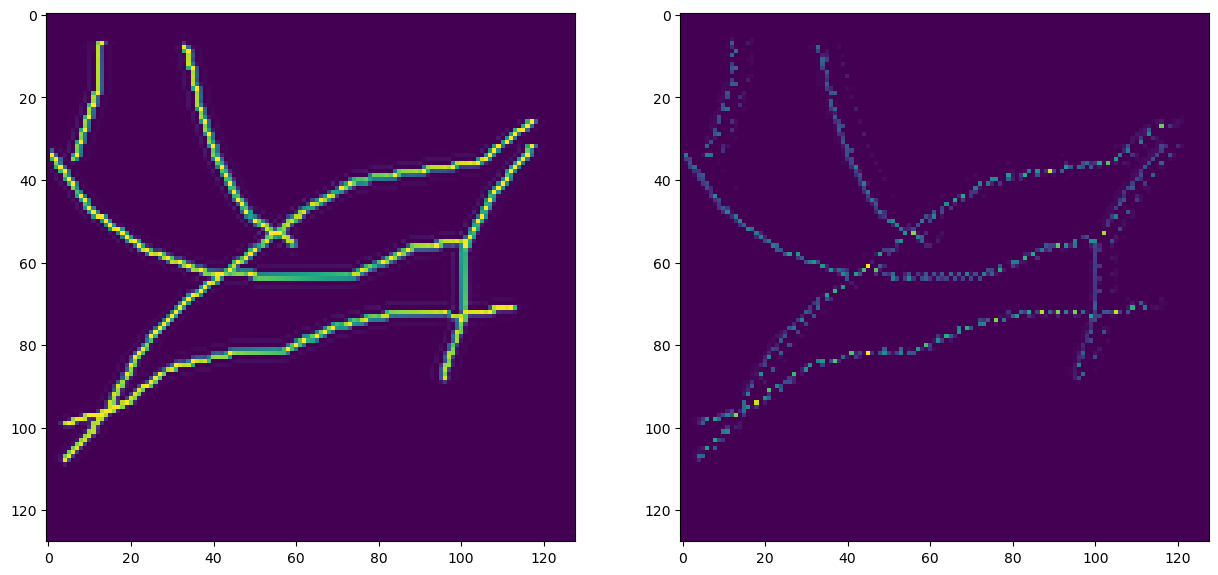

In [16]:
for i in range(temporal_cut):
    plt.figure(figsize=(15,10))
    plt.subplot2grid((1,2), (0,0))
    plt.imshow(y[i].squeeze())
    plt.subplot2grid((1,2), (0,1))
    plt.imshow(rec10x2xm[:,:,i])
    plt.show()
    clear_output(wait=True)

In [49]:
torch.save(np.array(rec), 'reconstruction_t10x_s2x_moving')

## 

In [14]:
def f(i):
    plt.figure(figsize=(15,8))
    plt.subplot2grid((2,2), (0,0))
    plt.imshow(hslt)
    plt.subplot2grid((2,2), (0,1))
    plt.imshow(np.array(lsht_downscaled10x2xm)[i])
    
    plt.subplot2grid((2,2), (1,0))
    plt.imshow(y[i].squeeze())
    plt.subplot2grid((2,2), (1,1))
    plt.imshow(rec10x2xm[:,:,i])
    plt.show()
    return

interact(f, i=widgets.IntSlider(min=0, max=temporal_cut-1, step=1, value=0))

interactive(children=(IntSlider(value=0, description='i', max=9), Output()), _dom_classes=('widget-interact',)…

<function __main__.f(i)>

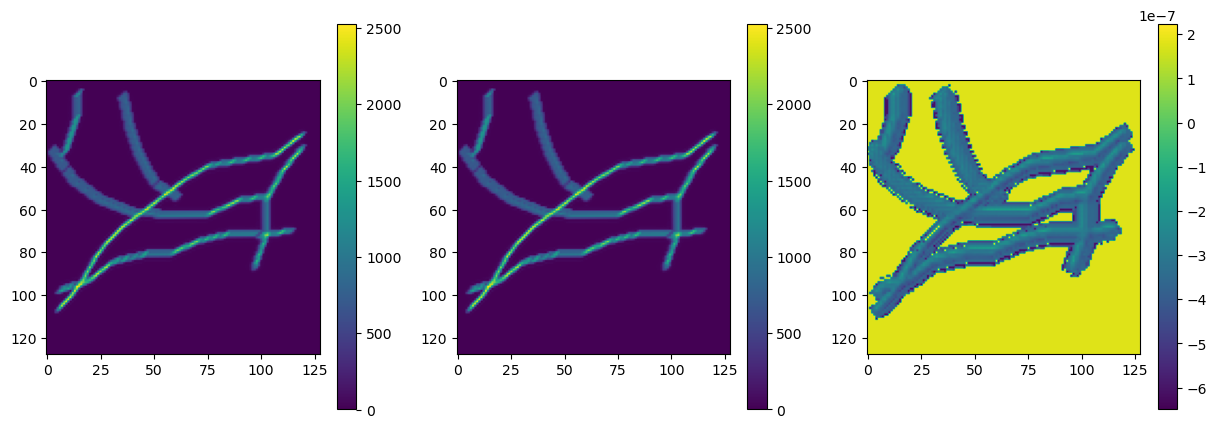

In [59]:
plt.figure(figsize=(15,5))
plt.subplot2grid((1,3), (0,0))
plt.imshow(np.array(rec).sum(-1))
plt.colorbar()
plt.subplot2grid((1,3), (0,1))
plt.imshow(np.array(hslt))
plt.colorbar()
plt.subplot2grid((1,3), (0,2))
plt.imshow(np.array(rec).sum(-1)-np.array(hslt))
plt.colorbar()
plt.show()

## Adjusted parameters for 2x spatial downsampling 10x temporal with movement

In [15]:
%%time
temporal_cut = 10
spatial_downsampling = 2
sigmablur = 1  # chosen by default

y = torch.load('y_test')[0][::300//temporal_cut]

hslt = y.sum(0).squeeze() #y[::2]
lsht_downscaled = torch.nn.functional.avg_pool2d(y, (spatial_downsampling, spatial_downsampling), stride=spatial_downsampling).squeeze()

eng = matlab.engine.start_matlab()
hres = hslt.shape[0]
lsht = np.ascontiguousarray(np.array(lsht_downscaled).transpose(1,2,0))
rec = eng.reconstruct_hres_lifimage(lsht, np.array(hslt), np.array([1, 1e-3, 1e-7, 1e-5]), np.float64(hres), np.float64(sigmablur), nargout=1)
eng.quit()

torch.save(np.array(rec), 'reconstruction_t10x_s2x_moving_flimparams')

CPU times: total: 93.8 ms
Wall time: 10min 8s


In [16]:
temporal_cut = 10
spatial_downsampling = 2
sigmablur = 1  # chosen by default

y = torch.load('y_test')[0][::300//temporal_cut]

hslt = y.sum(0).squeeze() #y[::2]
lsht_downscaled10x2xmf = torch.nn.functional.avg_pool2d(y, (spatial_downsampling, spatial_downsampling), stride=spatial_downsampling).squeeze()

rec10x2xmf = np.array(torch.load('reconstruction_t10x_s2x_moving_flimparams'))

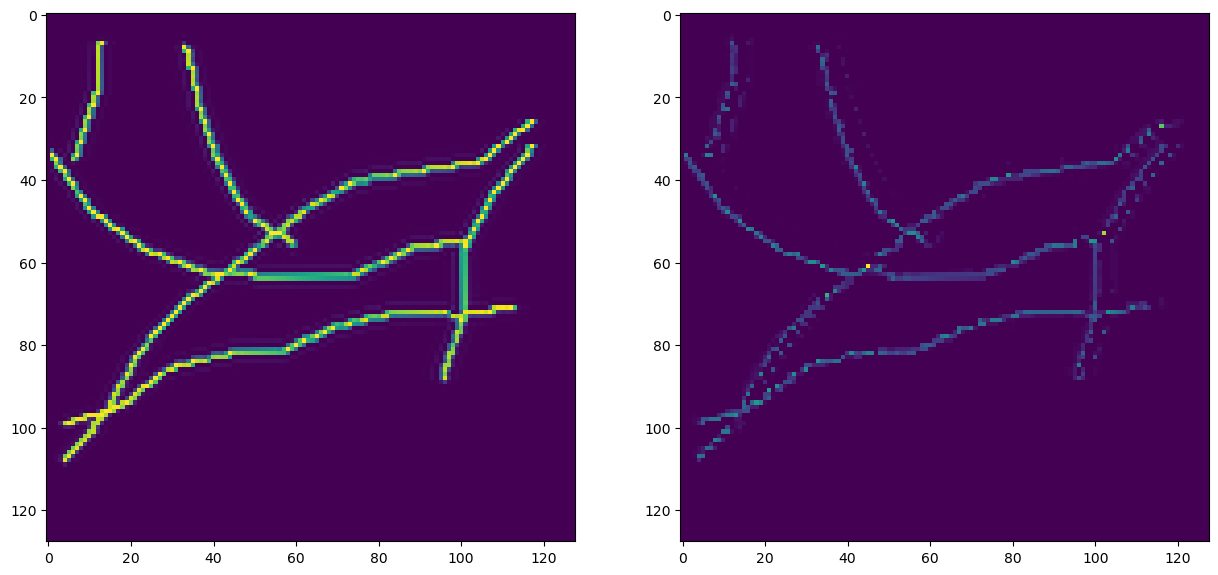

In [17]:
for i in range(temporal_cut):
    plt.figure(figsize=(15,10))
    plt.subplot2grid((1,2), (0,0))
    plt.imshow(y[i].squeeze())
    plt.subplot2grid((1,2), (0,1))
    plt.imshow(rec10x2xmf[:,:,i])
    plt.show()
    clear_output(wait=True)

## 

In [18]:
def f(i):
    plt.figure(figsize=(15,8))
    plt.subplot2grid((2,2), (0,0))
    plt.imshow(hslt)
    plt.subplot2grid((2,2), (0,1))
    plt.imshow(np.array(lsht_downscaled10x2xmf)[i])
    
    plt.subplot2grid((2,2), (1,0))
    plt.imshow(y[i].squeeze())
    plt.subplot2grid((2,2), (1,1))
    plt.imshow(rec10x2xmf[:,:,i])
    plt.show()
    return

interact(f, i=widgets.IntSlider(min=0, max=temporal_cut-1, step=1, value=0))

interactive(children=(IntSlider(value=0, description='i', max=9), Output()), _dom_classes=('widget-interact',)…

<function __main__.f(i)>

## Adjusted parameters and matrices for 2x spatial downsampling 10x temporal with movement

In [23]:
%%time
temporal_cut = 10
spatial_downsampling = 2
sigmablur = 1  # chosen by default

y = torch.load('y_test')[0][::300//temporal_cut]

hslt = y.sum(0).squeeze() #y[::2]
lsht_downscaled = torch.nn.functional.avg_pool2d(y, (spatial_downsampling, spatial_downsampling), stride=spatial_downsampling).squeeze()

eng = matlab.engine.start_matlab()
hres = hslt.shape[0]
lsht = np.ascontiguousarray(np.array(lsht_downscaled).transpose(1,2,0))
rec = eng.reconstruct_hres_lifimage(lsht, np.array(hslt), np.array([1, 1e-3, 1e-7, 1e-5]), np.float64(hres), np.float64(sigmablur), nargout=1)
eng.quit()

torch.save(np.array(rec), 'reconstruction_t10x_s2x_moving_flimparams_onlyp')

CPU times: total: 78.1 ms
Wall time: 10min 7s


In [24]:
temporal_cut = 10
spatial_downsampling = 2
sigmablur = 1  # chosen by default

y = torch.load('y_test')[0][::300//temporal_cut]

hslt = y.sum(0).squeeze() #y[::2]
lsht_downscaled10x2xmfp = torch.nn.functional.avg_pool2d(y, (spatial_downsampling, spatial_downsampling), stride=spatial_downsampling).squeeze()

rec10x2xmfp = np.array(torch.load('reconstruction_t10x_s2x_moving_flimparams_onlyp'))

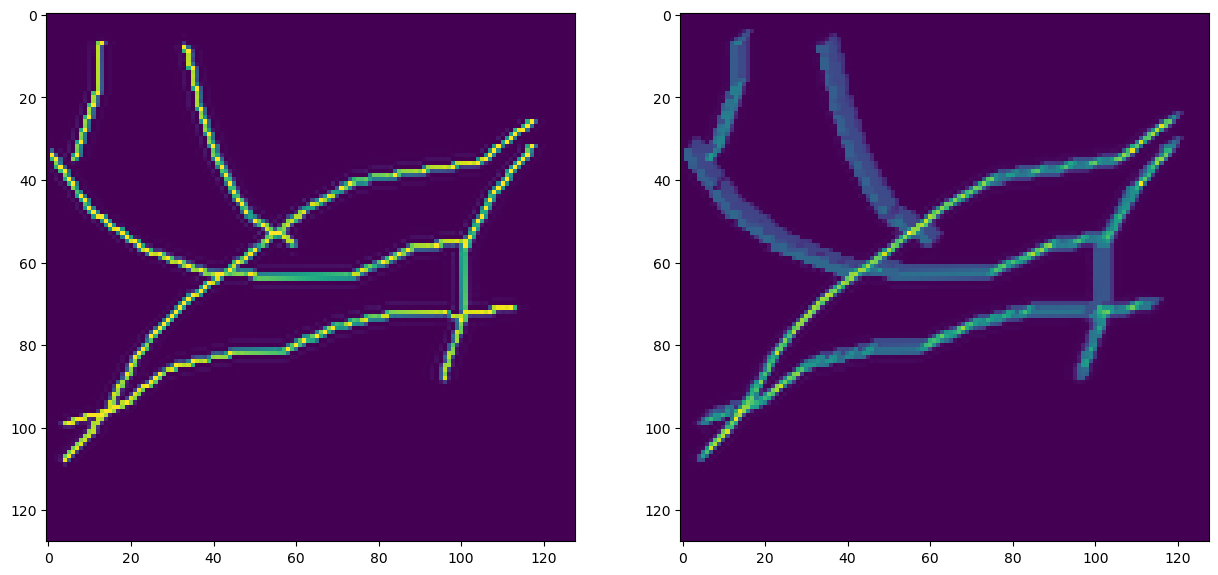

In [25]:
for i in range(temporal_cut):
    plt.figure(figsize=(15,10))
    plt.subplot2grid((1,2), (0,0))
    plt.imshow(y[i].squeeze())
    plt.subplot2grid((1,2), (0,1))
    plt.imshow(rec10x2xmfp[:,:,i])
    plt.show()
    clear_output(wait=True)

## 

In [26]:
def f(i):
    plt.figure(figsize=(15,8))
    plt.subplot2grid((2,2), (0,0))
    plt.imshow(hslt)
    plt.subplot2grid((2,2), (0,1))
    plt.imshow(np.array(lsht_downscaled10x2xmfp)[i])
    
    plt.subplot2grid((2,2), (1,0))
    plt.imshow(y[i].squeeze())
    plt.subplot2grid((2,2), (1,1))
    plt.imshow(rec10x2xmfp[:,:,i])
    plt.show()
    return

interact(f, i=widgets.IntSlider(min=0, max=temporal_cut-1, step=1, value=0))

interactive(children=(IntSlider(value=0, description='i', max=9), Output()), _dom_classes=('widget-interact',)…

<function __main__.f(i)>

## Adjusted parameters and matrices for 2x spatial downsampling 10x temporal with movement

Created the time selection matrix for the second loss term

In [37]:
%%time
temporal_cut = 10
spatial_downsampling = 2
sigmablur = 1  # chosen by default

y = torch.load('y_test')[0][::300//temporal_cut]

hslt = y[0].squeeze() #y[::2]
lsht_downscaled = torch.nn.functional.avg_pool2d(y, (spatial_downsampling, spatial_downsampling), stride=spatial_downsampling).squeeze()

eng = matlab.engine.start_matlab()
hres = hslt.shape[0]
lsht = np.ascontiguousarray(np.array(lsht_downscaled).transpose(1,2,0))
rec = eng.reconstruct_hres_lifimage(lsht, np.array(hslt), np.array([1, 1e-3, 1e-7, 1e-5]), np.float64(hres), np.float64(sigmablur), nargout=1)
eng.quit()

torch.save(np.array(rec), 'reconstruction_t10x_s2x_moving_flimparams_onlyp_notempint')

CPU times: total: 62.5 ms
Wall time: 13min 16s


In [38]:
temporal_cut = 10
spatial_downsampling = 2
sigmablur = 1  # chosen by default

y = torch.load('y_test')[0][::300//temporal_cut]

hslt = y[0].squeeze() #y[::2]
lsht_downscaled10x2xmfpnoi = torch.nn.functional.avg_pool2d(y, (spatial_downsampling, spatial_downsampling), stride=spatial_downsampling).squeeze()

rec10x2xmfpnoi = np.array(torch.load('reconstruction_t10x_s2x_moving_flimparams_onlyp_notempint'))

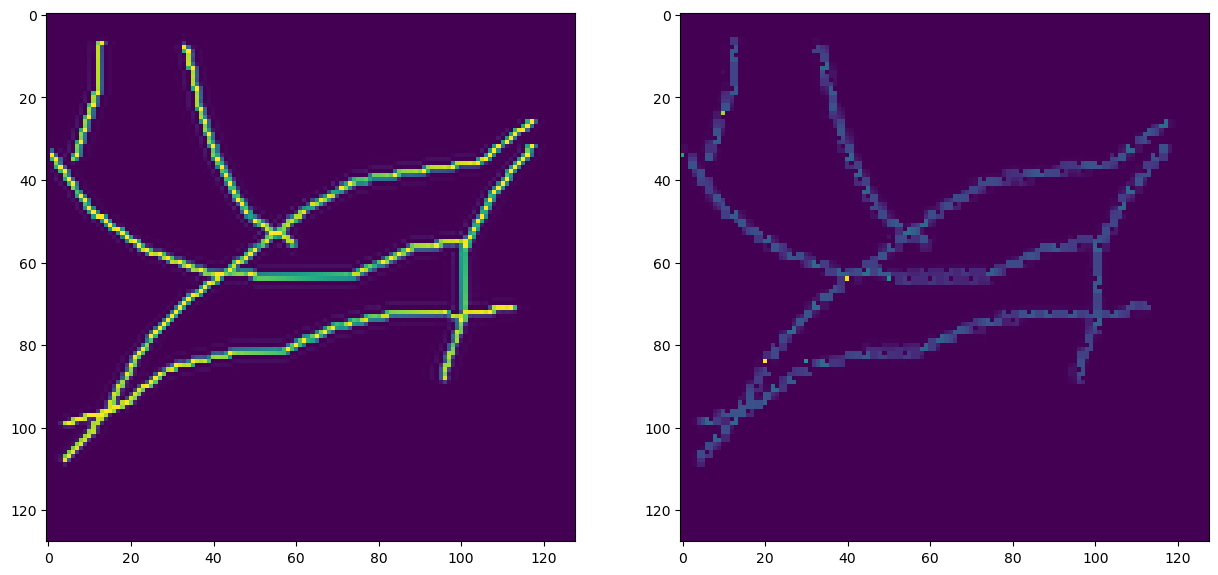

In [39]:
for i in range(temporal_cut):
    plt.figure(figsize=(15,10))
    plt.subplot2grid((1,2), (0,0))
    plt.imshow(y[i].squeeze())
    plt.subplot2grid((1,2), (0,1))
    plt.imshow(rec10x2xmfpnoi[:,:,i])
    plt.show()
    clear_output(wait=True)

## 

In [40]:
def f(i):
    plt.figure(figsize=(15,8))
    plt.subplot2grid((2,2), (0,0))
    plt.imshow(hslt)
    plt.subplot2grid((2,2), (0,1))
    plt.imshow(np.array(lsht_downscaled10x2xmfpnoi)[i])
    
    plt.subplot2grid((2,2), (1,0))
    plt.imshow(y[i].squeeze())
    plt.subplot2grid((2,2), (1,1))
    plt.imshow(rec10x2xmfpnoi[:,:,i])
    plt.show()
    return

interact(f, i=widgets.IntSlider(min=0, max=temporal_cut-1, step=1, value=0))

interactive(children=(IntSlider(value=0, description='i', max=9), Output()), _dom_classes=('widget-interact',)…

<function __main__.f(i)>